Installing libraries

In [1]:
!pip install fuzzywuzzy

In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=1acf51061952424e30726d3dd3d9f21668603967d939338fd4505ba780c36683
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

DESCRIPTORS FOR INPUT - DIRT, GREASE AND WASH TIME

In [14]:
grease = ctrl.Antecedent(np.arange(0, 100, 1), 'grease')
dirt = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt')
time = ctrl.Consequent(np.arange(0, 100, 1), 'washing time')

MEMEBERSHIP FUNCTION:

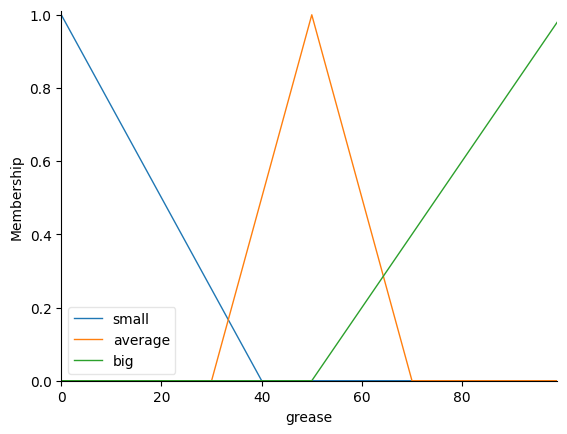

In [15]:
grease['small'] = fuzz.trimf(grease.universe, [0, 0, 40])
grease['average'] = fuzz.trimf(grease.universe, [30, 50, 70])
grease['big'] = fuzz.trimf(grease.universe, [50, 100, 100])
grease.view()

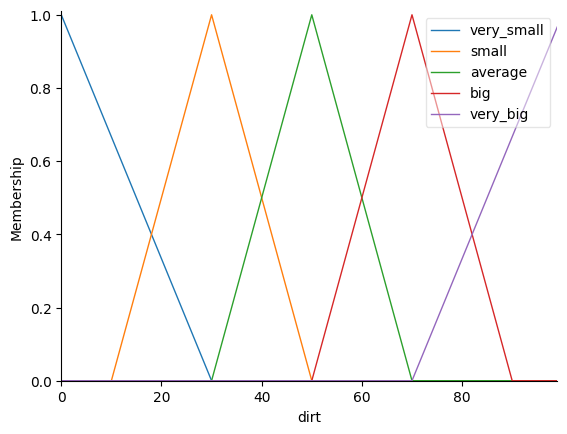

In [16]:
dirt['very_small'] = fuzz.trimf(dirt.universe, [0, 0, 30])
dirt['small'] = fuzz.trimf(dirt.universe, [10, 30, 50])
dirt['average'] = fuzz.trimf(dirt.universe, [30, 50, 70])
dirt['big'] = fuzz.trimf(dirt.universe, [50, 70, 90])
dirt['very_big'] = fuzz.trimf(dirt.universe, [70, 100, 100])
dirt.view()

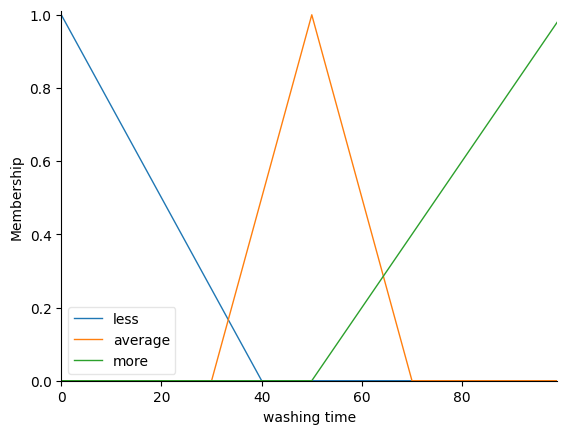

In [17]:
time['less'] = fuzz.trimf(time.universe, [0, 0, 40])
time['average'] = fuzz.trimf(time.universe, [30, 50, 70])
time['more'] = fuzz.trimf(time.universe, [50, 100, 100])
time.view()

In [18]:
rule1 = ctrl.Rule(antecedent=(dirt['very_small'] & grease['small']), consequent=time['less'])
rule2 = ctrl.Rule(antecedent=(dirt['very_small'] & grease['average']), consequent=time['average'])
rule3 = ctrl.Rule(antecedent=(dirt['very_small'] & grease['big']), consequent=time['more'])
rule4 = ctrl.Rule(antecedent=(dirt['small'] & grease['small']), consequent=time['average'])
rule5 = ctrl.Rule(antecedent=(dirt['small'] & grease['average']), consequent=time['more'])
rule6 = ctrl.Rule(antecedent=(dirt['small'] & grease['big']), consequent=time['more'])
rule7 = ctrl.Rule(antecedent=(dirt['average'] & grease['small']), consequent=time['average'])
rule8 = ctrl.Rule(antecedent=(dirt['average'] & grease['average']), consequent=time['more'])
rule9 = ctrl.Rule(antecedent=(dirt['average'] & grease['big']), consequent=time['more'])
rule10 = ctrl.Rule(antecedent=(dirt['big'] & grease['small']), consequent=time['average'])
rule11 = ctrl.Rule(antecedent=(dirt['big'] & grease['average']), consequent=time['more'])
rule12 = ctrl.Rule(antecedent=(dirt['big'] & grease['big']), consequent=time['more'])
rule13 = ctrl.Rule(antecedent=(dirt['very_big'] & grease['small']), consequent=time['more'])
rule14 = ctrl.Rule(antecedent=(dirt['very_big'] & grease['average']), consequent=time['more'])
rule15 = ctrl.Rule(antecedent=(dirt['very_big'] & grease['big']), consequent=time['more'])

In [19]:
washing_machine = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule15,rule15])
washing_machine = ctrl.ControlSystemSimulation(washing_machine)

In [20]:
washing_machine.input['dirt'] = 20
washing_machine.input['grease'] = 30
washing_machine.compute()
print(f"\nWASHING TIME = {washing_machine.output['washing time']}\n")


WASHING TIME = 33.7776111944028



In [21]:
washing_machine.input['dirt'] = 40
washing_machine.input['grease'] = 90
washing_machine.compute()
print(f"\nWASHING TIME = {washing_machine.output['washing time']}\n")


WASHING TIME = 80.0365296803653



In [23]:
washing_machine.input['dirt'] = 30
washing_machine.input['grease'] = 60
washing_machine.compute()
print(f"\nWASHING TIME = {washing_machine.output['washing time']}\n")


WASHING TIME = 80.0365296803653

